# UMAP Analysis on Synthetic Microscopy Data

In this notebook, we will create a synthetic dataset mimicking measurements from cell microscopy images. The dataset will include features like intensity, aspect ratio, perimeter, and elongation. We will then perform UMAP dimensionality reduction on these features and visualize the result using seaborn.

## Step 1: Creating Synthetic Dataset
We will generate a synthetic dataset using `numpy` and organize it into a `pandas` DataFrame.

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic data
n_samples = 500
intensity = np.random.normal(loc=100, scale=20, size=n_samples)
aspect_ratio = np.random.normal(loc=1.5, scale=0.3, size=n_samples)
perimeter = np.random.normal(loc=50, scale=10, size=n_samples)
elongation = np.random.normal(loc=2.0, scale=0.5, size=n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'Intensity': intensity,
    'AspectRatio': aspect_ratio,
    'Perimeter': perimeter,
    'Elongation': elongation
})

df.head()

,Intensity,AspectRatio,Perimeter,Elongation
0,109.934283,1.777853,63.993554,2.389181
1,97.234714,2.072825,59.246337,1.724407
2,112.953771,1.080430,50.596304,1.590901
3,130.460597,1.668891,43.530632,1.998313
4,95.316933,1.304807,56.982233,1.914908


## Step 2: UMAP Dimensionality Reduction
We will use the `umap-learn` library to perform UMAP on our dataset.

In [2]:
import umap

# Perform UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(df)

# Add UMAP results back to the DataFrame
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]

df.head()

,Intensity,AspectRatio,Perimeter,Elongation,UMAP1,UMAP2
0,109.934283,1.777853,63.993554,2.389181,6.769329,2.570214
1,97.234714,2.072825,59.246337,1.724407,4.289389,4.158487
2,112.953771,1.080430,50.596304,1.590901,8.815513,4.631134
3,130.460597,1.668891,43.530632,1.998313,11.231271,3.139328
4,95.316933,1.304807,56.982233,1.914908,4.120245,4.742416


## Step 3: Visualization using Seaborn
Finally, we will visualize the UMAP results using seaborn and save the plot as a PNG file.

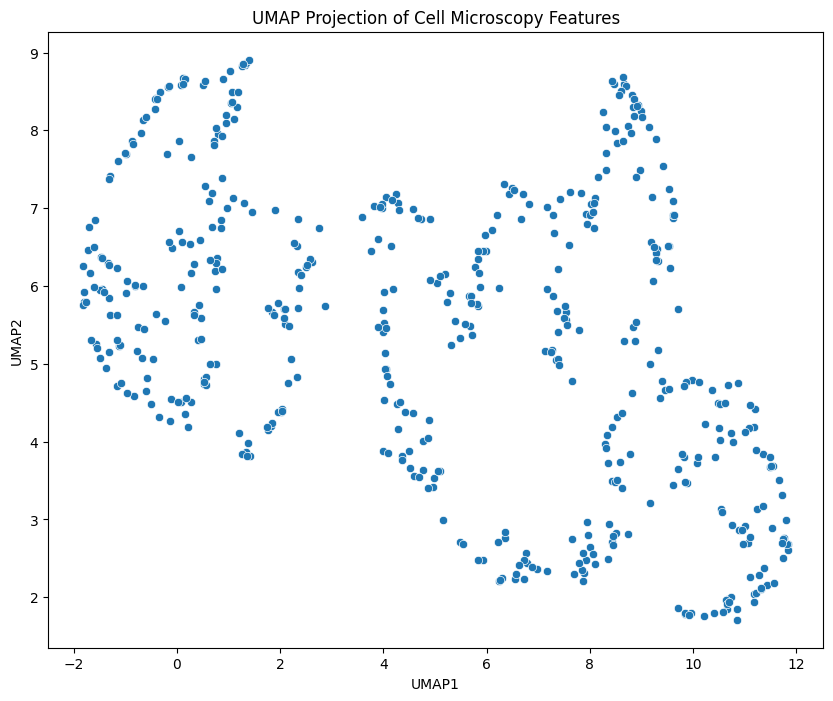

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=df)
plt.title('UMAP Projection of Cell Microscopy Features')
plt.savefig('umap_projection.png')
plt.show()